In [400]:
X = [
        [1.0,5.0],[1.25,5.35],[1.25,5.75],[1.5,6.25],[1.75,6.75],[2.0,6.5],[3.0,7.75],[3.5,8.25],[3.75,8.75],[3.95,9.1],
        [4.0,8.5],[2.5,7.25],[2.25,7.75],[2.0,6.5],[2.75,8.25],[4.5,8.9],[9.0,5.0],[8.75,5.85],[9.0,6.25],
        [8.0,7.0],[8.5,6.25],[8.5,6.75],[8.25,7.65],[7.0,8.25],[6.0,8.75],[5.5,8.25],[5.25,8.75],[4.9,8.75],
        [5.0,8.5],[7.5,7.75],[7.75,8.25],[6.75,8.0],[6.25,8.25],[4.5,8.9],[5.0,1.0],[1.25,4.65],[1.25,4.25],
        [1.5,3.75],[1.75,3.25],[2.0,3.5],[3.0,2.25],[3.5,1.75],[3.75,8.75],[3.95,0.9],[4.0,1.5],[2.5,2.75],
        [2.25,2.25],[2.0,3.5],[2.75,1.75],[4.5,1.1],[5.0,9.0],[8.75,5.15],[8.0,2.25],[8.25,3.0],[8.5,4.75],
        [8.5,4.25],[8.25,3.35],[7.0,1.75],[8.0,3.5],[6.0,1.25],[5.5,1.75],[5.25,1.25],[4.9,1.25],[5.0,1.5],
        [7.5,2.25],[7.75,2.75],[6.75,2.0],[6.25,1.75],[4.5,1.1],[3.0,4.5],[7.0,4.5],[5.0,3.0],[4.0,3.35],
        [6.0,3.35],[4.25,3.25],[5.75,3.25],[3.5,3.75],[6.5,3.75],[3.25,4.0],[6.75,4.0],[3.75,3.55],[6.25,3.55],
        [4.75,3.05],[5.25,3.05],[4.5,3.15],[5.5,3.15],[4.0,6.5],[4.0,6.75],[4.0,6.25],[3.75,6.5],[4.25,6.5],[4.25,6.75],
        [3.75,6.25],[6.0,6.5],[6.0,6.75],[6.0,6.25],[5.75,6.75],[5.75,6.25],[6.25,6.75],[6.25,6.25],[9.5,9.5],[2.5,9.5],[1.0,8.0]
    ]

In [401]:
newX = []
for item in X:
    point = Point(item[0],item[1])
    newX.append(point)
X = newX
X

In [425]:
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import sqrt
def regionQuery(Point, epsilon, X):
    neighbourPts = []
    for point in X:
        cp = Point.toArray()
        p = point.toArray()
        if sqrt((cp[0] - p[0])**2 + (cp[1] - p[1])**2)<epsilon:
            neighbourPts.append(point)
    return neighbourPts


In [426]:
regionQuery(X[40], 2, X)

In [419]:
class Point:
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def toArray(self):
        return [self.x,self.y]
    def set_core_point(self):
        self.core_point=True
    def get_core_point(self):
        return self.core_point
    def set_reachable_point(self):
        self.reachable_point=True
    def get_reachable_point(self):
        return self.reachable_point

class Cluster:
    points = []
    clusterCount = 0
    def __init__(self,cn):
        self.cn = cn
        self.points = []
        self.clusterCount +=1
        self.core_point = False
        self.reachable_point = False
    def get_cluster(self):
        return "cluster"+self.cn
    def add_point(self,pt):
        self.points.append(pt)
    def get_point_count(self):
        return len(points)
    def get_points(self):
        return self.points
    def has(self,point):
        return point in self.points
    def __str__(self):
        return "Cluster %s: %d points" % (self.cn, len(self.points))
point1 = Point(1,2)
point2 = Point(3,4)
c = Cluster("1")
c.add_point(point1)
c.add_point(point2)
for p in c.get_points():
    print(p.toArray())

[1, 2]
[3, 4]


In [486]:
def expandCluster(P, neighbourPoints, allClusters, cluster, epsilon, m, X, visited):
    if P not in (c for c in allClusters):
        cluster.add_point(P)
    for point in neighbourPoints:
        if point not in visited:
            visited.append(point)
            neighbourPts_2 = regionQuery(point, epsilon, X)
            if len(neighbourPts_2) >= m:
                for p in neighbourPts_2:
                    if p not in (c for c in allClusters):
                        cluster.add_point(p)
                    visited.append(p)
                neighbourPoints+=neighbourPts_2
        if point not in (c for c in allClusters):
            cluster.add_point(point)

In [493]:
def DBSCAN(X, epsilon, m):
    outliers = []
    visited = []
    reachablePoints = []
    allClusters = []
    cn = -1
    for point in X:
        if point not in visited:
            visited.append(point)
            neighbourPoints = regionQuery(point, epsilon, X)
        if len(neighbourPoints) < m:
            outliers.append(point)
        else:
            if point not in (c for c in allClusters):
                cn+=1
                cluster = Cluster(cn)
                allClusters.append(cluster)
                expandCluster(point, neighbourPoints, allClusters, cluster, epsilon, m, X, visited)
    print("Number of clusters: ", len(allClusters))
    for cluster in allClusters:
        cluster.__str__()
    cmap = plt.cm.get_cmap('gist_ncar', len(allClusters))
    print ("number of outliers:", len(outliers))
    count = 0;
    for i in range(len(allClusters)):
        print(allClusters[i])
        cluster = allClusters[i]
        clusterPoints = cluster.get_points()
        for point in clusterPoints:
            count += 1
            p = point.toArray()
            plt.scatter(p[0],p[1],color = cmap(i))
    plt.show()
    print(count)

Number of clusters:  63
number of outliers: 40
Cluster 0: 16 points
Cluster 1: 10 points
Cluster 2: 10 points
Cluster 3: 14 points
Cluster 4: 10 points
Cluster 5: 10 points
Cluster 6: 15 points
Cluster 7: 10 points
Cluster 8: 10 points
Cluster 9: 10 points
Cluster 10: 18 points
Cluster 11: 10 points
Cluster 12: 10 points
Cluster 13: 7 points
Cluster 14: 4 points
Cluster 15: 4 points
Cluster 16: 4 points
Cluster 17: 4 points
Cluster 18: 4 points
Cluster 19: 10 points
Cluster 20: 7 points
Cluster 21: 7 points
Cluster 22: 27 points
Cluster 23: 17 points
Cluster 24: 17 points
Cluster 25: 14 points
Cluster 26: 10 points
Cluster 27: 10 points
Cluster 28: 10 points
Cluster 29: 11 points
Cluster 30: 8 points
Cluster 31: 10 points
Cluster 32: 7 points
Cluster 33: 7 points
Cluster 34: 26 points
Cluster 35: 13 points
Cluster 36: 9 points
Cluster 37: 9 points
Cluster 38: 9 points
Cluster 39: 9 points
Cluster 40: 18 points
Cluster 41: 4 points
Cluster 42: 4 points
Cluster 43: 4 points
Cluster 44: 4

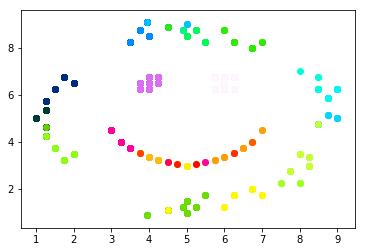

701


In [494]:
DBSCAN(newX,0.6,3)